Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_colwidth', None)

Load and Preview Dataset

In [ ]:
df = pd.read_csv("Coursera.csv")

print("Shape of dataset",df.shape)
print("\nColumns of dataset",df.columns)
df.head()

Shape of dataset (3522, 7)

Columns of dataset Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or Television,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature-length-screenplay-for-film-or-television,"Write a Full Length Feature Film Script In this course, you will write a complete, feature-length screenplay for film or television, be it a serious drama or romantic comedy or anything in between. You�ll learn to break down the creative process into components, and you�ll discover a structured process that allows you to produce a polished and pitch-ready script by the end of the course. Completing this project will increase your confidence in your ideas and abilities, and you�ll feel prepared to pitch your first script and get started on your next. This is a course designed to tap into your creativity and is based in ""Active Learning"". Most of the actual learning takes place within your own activities - that is, writing! You will learn by doing. Here is a link to a TRAILER for the course. To view the trailer, please copy and paste the link into your browser. https://vimeo.com/382067900/b78b800dc0 Learner review: ""Love the approach Professor Wheeler takes towards this course. It's to the point, easy to follow, and very informative! Would definitely recommend it to anyone who is interested in taking a Screenplay Writing course! The course curriculum is simple: We will adopt a professional writers room process in which you�ll write, post your work for peer review, share feedback with your peers and revise your work with the feedback you receive from your peers. That's how we do it in the real world. You will feel as if you were in a professional writers room yet no prior experience as a writer is required. I'm a proponent of Experiential Learning (Active Learning). My lectures are short (sometimes just two minutes long) and to the point, designed in a step-by-step process essential to your success as a script writer. I will guide you but I won�t ""show"" you how to write. I firmly believe that the only way to become a writer is to write, write, write. Learner Review: ""I would like to thank this course instructor. It's an amazing course"" What you�ll need to get started: As mentioned above, no prior script writing experience is required. To begin with, any basic word processor will do. During week two, you can choose to download some free scriptwriting software such as Celtx or Trelby or you may choose to purchase Final Draft, the industry standard, or you can continue to use your word processor and do your own script formatting. Learner Review: ""Now I am a writer!"" If you have any concerns regarding the protection of your original work, Coursera's privacy policy protects the learner's IP and you are indeed the sole owners of your work.",Drama Comedy peering screenwriting film Document Review dialogue creative writing Writing unix shells arts-and-humanities music-and-art
1,Business Strategy: Business Model Canvas Analysis with Miro,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis-miro,"By the end of this guided project, you will be fluent in identifying and creating Business Model Canvas solutions based on previous high-level analyses and research data. This will enable you to identify and map the elements required for new products and services. Furthermore, it is essential for generating positive results for your business venture. This guided project is designed to engage and harness your visionary and exploratory abilities. You will use proven models in strategy and product development with the Miro platform to explore and analyse your business propositions. We will practice critically examining results from previous analysis and research results in deriving the values for each of the business model sections.",Finance business plan persona (user experience) business model canvas Planning Business project Product 

In [ ]:
cols=['Course Name', 'University', 'Difficulty Level', 'Course Description', 'Skills', 'Course Rating']
df=df[cols].copy()

df.dropna(subset=['Skills'], inplace=True)

df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')
df['Course Rating'].fillna(df['Course Rating'].mean(), inplace=True)

df['University'] = df['University'].str.replace('�','E')
df=df.drop_duplicates()
df=df.fillna('')

df['Course Description'] = df['Course Description'].str.replace('�','W')
df=df.drop_duplicates()
df=df.fillna('')

df=df.reset_index(drop=True)
df.head()

/tmp/ipython-input-4210672252.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Course Rating'].fillna(df['Course Rating'].mean(), inplace=True)


,Course Name,University,Difficulty Level,Course Description,Skills,Course Rating
0,Write A Feature Length Screenplay For Film Or Television,Michigan State University,Beginner,"Write a Full Length Feature Film Script In this course, you will write a complete, feature-length screenplay for film or television, be it a serious drama or romantic comedy or anything in between. YouWll learn to break down the creative process into components, and youWll discover a structured process that allows you to produce a polished and pitch-ready script by the end of the course. Completing this project will increase your confidence in your ideas and abilities, and youWll feel prepared to pitch your first script and get started on your next. This is a course designed to tap into your creativity and is based in ""Active Learning"". Most of the actual learning takes place within your own activities - that is, writing! You will learn by doing. Here is a link to a TRAILER for the course. To view the trailer, please copy and paste the link into your browser. https://vimeo.com/382067900/b78b800dc0 Learner review: ""Love the approach Professor Wheeler takes towards this course. It's to the point, easy to follow, and very informative! Would definitely recommend it to anyone who is interested in taking a Screenplay Writing course! The course curriculum is simple: We will adopt a professional writers room process in which youWll write, post your work for peer review, share feedback with your peers and revise your work with the feedback you receive from your peers. That's how we do it in the real world. You will feel as if you were in a professional writers room yet no prior experience as a writer is required. I'm a proponent of Experiential Learning (Active Learning). My lectures are short (sometimes just two minutes long) and to the point, designed in a step-by-step process essential to your success as a script writer. I will guide you but I wonWt ""show"" you how to write. I firmly believe that the only way to become a writer is to write, write, write. Learner Review: ""I would like to thank this course instructor. It's an amazing course"" What youWll need to get started: As mentioned above, no prior script writing experience is required. To begin with, any basic word processor will do. During week two, you can choose to download some free scriptwriting software such as Celtx or Trelby or you may choose to purchase Final Draft, the industry standard, or you can continue to use your word processor and do your own script formatting. Learner Review: ""Now I am a writer!"" If you have any concerns regarding the protection of your original work, Coursera's privacy policy protects the learner's IP and you are indeed the sole owners of your work.",Drama Comedy peering screenwriting film Document Review dialogue creative writing Writing unix shells arts-and-humanities music-and-art,4.8
1,Business Strategy: Business Model Canvas Analysis with Miro,Coursera Project Network,Beginner,"By the end of this guided project, you will be fluent in identifying and creating Business Model Canvas solutions based on previous high-level analyses and research data. This will enable you to identify and map the elements required for new products and services. Furthermore, it is essential for generating positive results for your business venture. This guided project is designed to engage and harness your visionary and exploratory abilities. You will use proven models in strategy and product development with the Miro platform to explore and analyse your business propositions. We will practice critically examining results from previous analysis and research results in deriving the values for each of the business model sections.",Finance business plan persona (user experience) business model canvas Planning Business project Product Development presentation Strategy business business-strategy,4.8
2,Silicon Thin Film Solar Cells,Ecole Polytechnique,Advanced,"This course consists of a ge

In [ ]:
df['Skills'] = df['Skills'].str.lower().str.strip()
df['Course Description'] = df['Course Description'].str.lower().str.strip()
df['University'] = df['University'].str.lower().str.strip()
df['Course Name'] = df['Course Name'].str.strip()

df.drop_duplicates(subset=['Course Name'], inplace=True)

print("After Cleaning",df.shape)
df.head()

After Cleaning (3416, 6)


,Course Name,University,Difficulty Level,Course Description,Skills,Course Rating
0,Write A Feature Length Screenplay For Film Or Television,michigan state university,Beginner,"write a full length feature film script in this course, you will write a complete, feature-length screenplay for film or television, be it a serious drama or romantic comedy or anything in between. youwll learn to break down the creative process into components, and youwll discover a structured process that allows you to produce a polished and pitch-ready script by the end of the course. completing this project will increase your confidence in your ideas and abilities, and youwll feel prepared to pitch your first script and get started on your next. this is a course designed to tap into your creativity and is based in ""active learning"". most of the actual learning takes place within your own activities - that is, writing! you will learn by doing. here is a link to a trailer for the course. to view the trailer, please copy and paste the link into your browser. https://vimeo.com/382067900/b78b800dc0 learner review: ""love the approach professor wheeler takes towards this course. it's to the point, easy to follow, and very informative! would definitely recommend it to anyone who is interested in taking a screenplay writing course! the course curriculum is simple: we will adopt a professional writers room process in which youwll write, post your work for peer review, share feedback with your peers and revise your work with the feedback you receive from your peers. that's how we do it in the real world. you will feel as if you were in a professional writers room yet no prior experience as a writer is required. i'm a proponent of experiential learning (active learning). my lectures are short (sometimes just two minutes long) and to the point, designed in a step-by-step process essential to your success as a script writer. i will guide you but i wonwt ""show"" you how to write. i firmly believe that the only way to become a writer is to write, write, write. learner review: ""i would like to thank this course instructor. it's an amazing course"" what youwll need to get started: as mentioned above, no prior script writing experience is required. to begin with, any basic word processor will do. during week two, you can choose to download some free scriptwriting software such as celtx or trelby or you may choose to purchase final draft, the industry standard, or you can continue to use your word processor and do your own script formatting. learner review: ""now i am a writer!"" if you have any concerns regarding the protection of your original work, coursera's privacy policy protects the learner's ip and you are indeed the sole owners of your work.",drama comedy peering screenwriting film document review dialogue creative writing writing unix shells arts-and-humanities music-and-art,4.8
1,Business Strategy: Business Model Canvas Analysis with Miro,coursera project network,Beginner,"by the end of this guided project, you will be fluent in identifying and creating business model canvas solutions based on previous high-level analyses and research data. this will enable you to identify and map the elements required for new products and services. furthermore, it is essential for generating positive results for your business venture. this guided project is designed to engage and harness your visionary and exploratory abilities. you will use proven models in strategy and product development with the miro platform to explore and analyse your business propositions. we will practice critically examining results from previous analysis and research results in deriving the values for each of the business model sections.",finance business plan persona (user experience) business model canvas planning business project product development presentation strategy business business-strategy,4.8
2,Silicon Thin Film Solar Cells,ecole polytechnique,Advanced,"this course consists of a ge

/tmp/ipython-input-1244659750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Difficulty Level', data=df, order=df['Difficulty Level'].value_counts().index, palette='viridis')


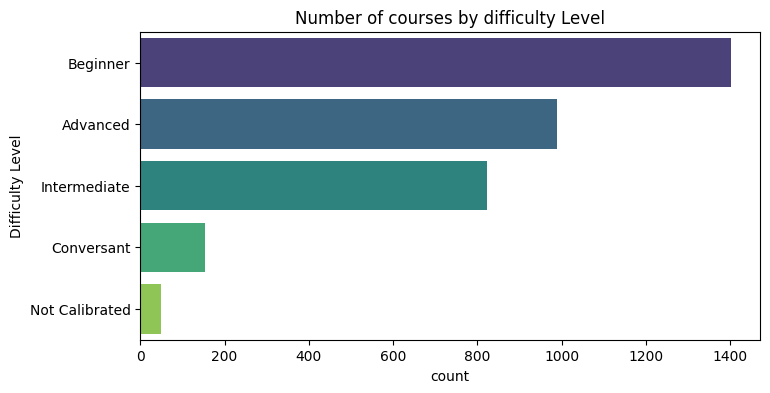

/tmp/ipython-input-1244659750.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_uni.values, y=top_uni.index, palette='coolwarm')


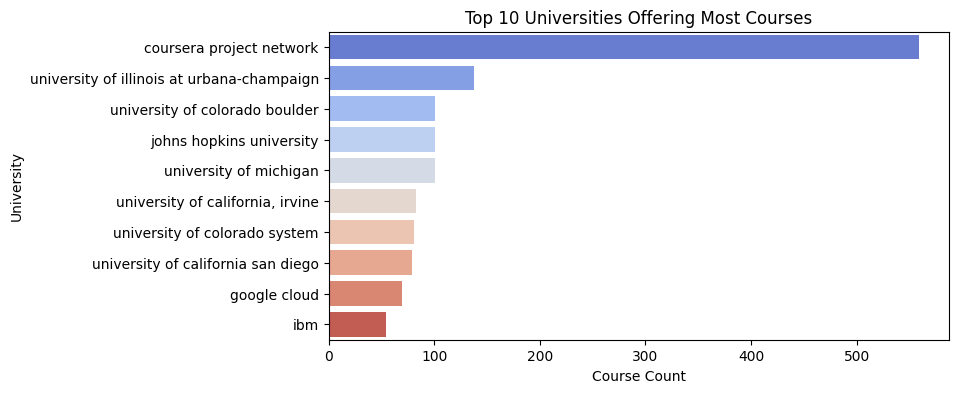

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(y='Difficulty Level', data=df, order=df['Difficulty Level'].value_counts().index, palette='viridis')
plt.title("Number of courses by difficulty Level")
plt.show()

plt.figure(figsize=(8,4))
top_uni= df['University'].value_counts().head(10)
sns.barplot(x=top_uni.values, y=top_uni.index, palette='coolwarm')
plt.title("Top 10 Universities Offering Most Courses")
plt.xlabel('Course Count')
plt.show()



TF-IDF Vectorization And Cosine Similarity

In [ ]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(df['Skills'])

tfidf_matrix.shape

(3416, 4336)

In [ ]:
cosine_sim= cosine_similarity(tfidf_matrix, tfidf_matrix)


Recommendation Function

In [ ]:
def recommend_courses(skill_input, top=5):
    skill_input=[skill_input.lower()]
    skill_vec=tfidf.transform(skill_input)

    sim_scores=cosine_similarity(skill_vec, tfidf_matrix).flatten()

    top_indices=sim_scores.argsort()[-top:][::-1]

    return df.iloc[top_indices][['Course Name', 'University', 'Difficulty Level', 'Course Description' , 'Course Rating' ]]

recommend_courses("SQL")

,Course Name,University,Difficulty Level,Course Description,Course Rating
3301,Database Design with SQL Server Management Studio (SSMS),coursera project network,Beginner,"in this 1-hour 40-minutes long project-based course, you will learn how to design a database system by identifying the entities and their attributes as well as the relations between these entities. furthermore, you will get to implement the database system that you have designed using microsoft sql server through sql server management studio. this project will have you explore key concepts of database design and will have you get introduced to the building blocks of the world of databases. note: this project works best for learners who are based in the north america region. wewre currently working on providing the same experience in other regions.",4.5
3196,Beginning SQL Server,coursera project network,Beginner,"in this 1-hour long project-based course, you will learn how to perform core job-related tasks within the sql server management studio (ssms) environment. you will use the tools in ssms to automatically generate queries, manage security permissions, create dependent scripts, and create and backup a database. you will get hands-on practices performing these tasks using real data in a sql server database.",4.5
1136,Advanced SQL Retrieval Queries in SQLiteStudio,coursera project network,Beginner,"in this course you will learn to write advanced sql (structured query language) retrieval queries using sqlitestudio. retrieving data from a relational database is one of the primary methods used by application and web developers to display data and populate web pages. since a database can be made up of a complex combination of relational tables, retrieving that data can be challenging. you can meet those challenges by gaining experience with some of the more advanced sql coding techniques. through hands-on practice you will write sql code to use functions and grouping, sub queries, calculated fields, and conditional expressions. in addition, you will experiment with alternative methods of joining tables for data retrieval. note: this course works best for learners who are based in the north america region. wewre currently working on providing the same experience in other regions.",4.6
2276,Creating New BigQuery Datasets and Visualizing Insights,google cloud,Conversant,"this is the second course in the data to insights specialization. here we will cover how to ingest new external datasets into bigquery and visualize them with google data studio. we will also cover intermediate sql concepts like multi-table joins and unions which will allow you to analyze data across multiple data sources. note: even if you have a background in sql, there are bigquery specifics (like handling query cache and table wildcards) that may be new to you. >>> by enrolling in this specialization you agree to the qwiklabs terms of service as set out in the faq and located at: https://qwiklabs.com/terms_of_service <<<",4.6
2618,Structured Query Language (SQL) using SAS,sas,Advanced,"course description in this course, you learn about structured query language (sql) and how it can be used in sas programs to create reports and query your data. wby the end of this course, a learner will be able toww ?\tquery and subset data. ?\tsummarize and present data. ?\tcombine tables using joins and set operators. ?\tcreate and modify tables and views. ?\tcreate data-driven macro variables using a query. ?\taccess dbms data with sas/access technology.",5.0


In [ ]:
skills = ["python", "data visualization", "cloud computing", "business analytics"]
for s in skills:
    print(f"\n🔹 Top courses for skill: {s}")
    print(recommend_courses(s))



🔹 Top courses for skill: python
                                                    Course Name  ... Course Rating
537                  Python Programming: A Concise Introduction  ...           4.6
1987                             Python for Data Science and AI  ...           4.5
1563        Pandas Python Library for Beginners in Data Science  ...           4.4
593   Python Basics: Create a Guessing Number Game from Scratch  ...           4.7
2944     Build a Data Science Web App with Streamlit and Python  ...           4.6

[5 rows x 5 columns]

🔹 Top courses for skill: data visualization
                                         Course Name  ... Course Rating
1864          Data Visualization with Plotly Express  ...           4.6
1162                              Data Visualization  ...           4.4
2485        Statistical Data Visualization in Python  ...           3.7
1133  Analyze Box Office Data with Plotly and Python  ...           4.5
525       Fundamentals of Visualization wi

In [ ]:

df.to_csv("Cleaned_Coursera.csv", index=False)

In [ ]:


data = pd.read_csv("Coursera.csv")

def recommend_courses(skill):
    skill = skill.lower().strip()
    results = data[data['Course Name'].str.lower().str.contains(skill, na=False)]

    if results.empty:
        return "❌ No matching courses found. Try another keyword."

    top_courses = results.head(5)[['Course Name', 'University', 'Difficulty Level', 'Skills']]
    return top_courses

interface = gr.Interface(
    fn=recommend_courses,
    inputs=gr.Textbox(label="Enter a Skill (e.g., Python, Machine Learning, Cloud Computing)"),
    outputs=gr.Dataframe(label="Recommended Courses"),
    title="Skill-Based Course Recommendation System",
    description="Enter a skill you want to learn, and get top Coursera courses instantly!",
    examples=[["machine learning"], ["python"], ["data analytics"], ["cloud computing"]]
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://562924641d23927f94.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Upgraded Version

In [ ]:

df = pd.read_csv("Coursera.csv")

df.columns = df.columns.str.strip().str.lower()

df = df.rename(columns={
    'course name': 'course_name',
    'difficulty level': 'level',
    'course url': 'url'
})

def recommend_courses(skill, difficulty):
    if not skill or skill.strip() == "":
        return "⚠️ Please enter a skill to get recommendations."

    results = df[df['skills'].str.contains(skill, case=False, na=False)]

    if difficulty != "All":
        results = results[results['level'].str.contains(difficulty, case=False, na=False)]

    if results.empty:
        return f"😕 No courses found for '{skill}' at '{difficulty}' level."

    if 'rating' in results.columns:
        results = results.sort_values(by='rating', ascending=False)

    top_courses = results.head(5)

    html = "<div style='display: flex; flex-wrap: wrap; gap: 16px;'>"
    for _, row in top_courses.iterrows():
        title = row.get('course_name', 'Unknown Course')
        rating = row.get('rating', 'N/A')
        level = row.get('level', 'N/A')
        url = row.get('url', '#')

        html += f"""
        <div style='background: #1e1e2f; padding: 16px; border-radius: 12px; width: 300px; box-shadow: 0 2px 8px rgba(0,0,0,0.3);'>
            <h3 style='color:#8ab4f8; margin-bottom:8px; font-size:18px;'><a href='{url}' target='_blank' style='color:#8ab4f8; text-decoration:none;'>{title}</a></h3>
            <p style='color:#e8eaed; margin:4px 0;'>Rating: {rating}</p>
            <p style='color:#e8eaed; margin:4px 0;'>Level: {level}</p>
        </div>
        """
    html += "</div>"

    return html


with gr.Blocks(theme=gr.themes.Soft(primary_hue="indigo", secondary_hue="blue")) as demo:
    gr.Markdown(
        """
        <h1 style='text-align:center;'>Skill-Based Course Recommendation System</h1>
        <p style='text-align:center;'>Find the best Coursera courses that match your skills and difficulty level!</p>
        """
    )

    with gr.Row():
        skill_input = gr.Textbox(label="Enter a Skill (e.g., Python, Data Analytics, Machine Learning)", placeholder="e.g. Python")
        difficulty_input = gr.Dropdown(choices=["All", "Beginner", "Intermediate", "Advanced"], label="Difficulty Level", value="All")

    submit_btn = gr.Button("Get Recommendations", variant="primary")
    clear_btn = gr.Button("Clear")

    output = gr.HTML(label="Recommended Courses")

    submit_btn.click(fn=recommend_courses, inputs=[skill_input, difficulty_input], outputs=output)
    clear_btn.click(fn=lambda: "", inputs=None, outputs=output)

    gr.Examples(
        examples=["Python", "Machine Learning", "Data Analytics", "Cloud Computing"],
        inputs=skill_input
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fc43736b1d96536740.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
